In [1]:
import praw
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re


client_id = 'DJvj841C-CNzMA'
client_secret = 'HKAoQzpLHhwnT9pDqyDVydoHmYpxQg'
user_agent = 'BoW'
reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)

In [2]:
# Posteriormente generamos DF con los post de Depresion que encontramos en el subredit de "Depresion"
# En este caso, analizamos 295 post que es la data que nos deja extraer la API
posts = []
ml_subreddit = reddit.subreddit('Depresion')
for post in ml_subreddit.hot(limit=295):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

# Generamos un DF en donde dejamos solo aquellos post que contienen texto, que es el que vamos a analizar.
post_con_cuerpo = posts[posts.body!=''].reset_index(drop=True)

texto_amplio = [texto for texto in post_con_cuerpo.body]
texto_amplio = ' '.join(texto_amplio)

tokens = word_tokenize(texto_amplio)

stopwords_es = stopwords.words('spanish')

# Primero eliminamos la los simbolos de puntuacion que podamos encontrar en los tokens
puntuacion = re.compile(r"[-,.;;()!#$%&¿¡?``''¨´|0-9]")

post_punctuation = []
for words in tokens:
    word = puntuacion.sub("",words)
    if len(word)>0:
        post_punctuation.append(word)
        
len(post_punctuation)

59475

In [3]:
len(stopwords_es)

313

In [5]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

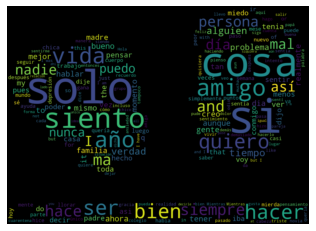

In [13]:
custom_mask = np.array(Image.open('.\Analisis\Imagenes\Mujer y Hombre.jpg'))
wc = WordCloud(stopwords = stopwords_es, mask = custom_mask)
wc.generate(texto_amplio)
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')
plt.show()

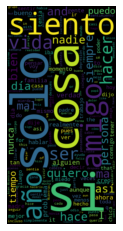

In [15]:
custom_mask = np.array(Image.open('.\Analisis\Imagenes\Mujer Perfil.png'))
wc = WordCloud(stopwords = stopwords_es, mask = custom_mask)
wc.generate(texto_amplio)
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')
plt.show()

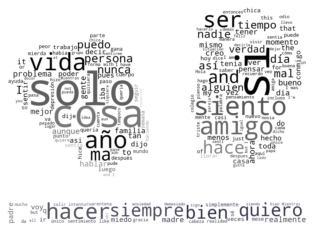

In [19]:
custom_mask = np.array(Image.open('.\Analisis\Imagenes\Mujer y Hombre.jpg'))
wc = WordCloud(background_color = 'white',stopwords = stopwords_es, mask = custom_mask)
wc.generate(texto_amplio)
image_colors = ImageColorGenerator(custom_mask)
wc.recolor(color_func = image_colors)

plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')
plt.show()

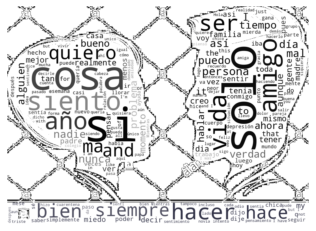

In [21]:
custom_mask = np.array(Image.open('.\Analisis\Imagenes\Mujer y Hombre.jpg'))
wc = WordCloud(background_color = 'white',stopwords = stopwords_es, mask = custom_mask,contour_width = 1, contour_color = 'black')
wc.generate(texto_amplio)
image_colors = ImageColorGenerator(custom_mask)
wc.recolor(color_func = image_colors)

plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [14]:
import pandas as pd
import json

#data = pd.read_json('./Proyecto_Final_Ironhack/Telegram_Bot/DataRecolectada - 1.json')
#data.describe()

#data = json.load('')
#data

with open('.\Proyecto_Final_Ironhack\Telegram_Bot\DataRecolectada - 1.json') as f:
    data = json.load(f)

In [15]:
#data = json.dumps(data)
df = pd.DataFrame(data)
df

ValueError: arrays must all be same length

In [18]:
for key in data:
    print(key,len(data[key]))


1531026146 28
601887628 28
1437527766 28
33942341 28
1772055088 28
1769050128 28
1509037681 28
897313585 28
1327612243 28
1386110772 28
1624023077 28
1764524955 28
1761873131 28
1566876652 28
496690805 28
871349142 4
246238552 28
1541370417 28
372050055 28
1586676605 28
1512360113 28
1387564629 28
1507973597 28
428181476 28
1322716637 28
803363349 28
1283320981 28
1562252208 28
746533069 28
1219617335 28
70566602 27
1073681745 28
1780491428 28
1470368478 28
1330327567 28
1412906515 28
1767623306 28
1527898695 28
1077129343 28
1568529228 28
1574503007 28
1342469879 28
